## Part 1- Convolutions
Basic Keras implementation to explain CNN architecture

In [118]:
### Load packages for keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.layers import Conv3D

import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import random
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization,LeakyReLU
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from datetime import datetime

In [20]:
### Basic CNN with convolutional layer and Mas pooling
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-tra

In [64]:
#### digit classification using convolutions layers created in the previous step
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)             

### 2-D Input image with 1-D Convolution

In [65]:
### 2 D input image with 1-D convolutions

model_a = Sequential()
model_a.add(Conv1D(filters=20, kernel_size=4,activation='relu', input_shape=(28, 28,1)))
model_a.summary()

# num_params = filters * kernel_size * input_channels + filters
# num_params = 20 * 4 * 1 + 20 = 100

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 28, 25, 20)        100       
                                                                 
Total params: 100
Trainable params: 100
Non-trainable params: 0
_________________________________________________________________


### 3-D input image with 2-D convolution

In [58]:
### 3 D input image with 2-D convolutions

model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(2, 2), activation='relu', input_shape=(56, 56, 3)))
model.summary()
#num_params = filters * kernel_size * input_channels + filters
#num_params = 28 * 2 * 2 * 3 + 28 = 364

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 55, 55, 28)        364       
                                                                 
Total params: 364
Trainable params: 364
Non-trainable params: 0
_________________________________________________________________


### 3D convolutions with 2D image
It is not possible to have 3D convolution operation over 2D image, Since 3D convolution requires an input with 3 dimenions i.e a 3D input volume , but 2D image has only 2 dimensions.Hence its not possible.


In [77]:
### 3 D input image with 3-D convolutions

model = Sequential()
model.add(Conv3D(filters=30, kernel_size=(3, 3, 3), activation='relu', input_shape=(64, 64,3,1)))
model.summary()

#num_params = filters * kernel_size * input_channels + filters
#num_params = 30 * 3 * 3 * 3 * 1 + 30 = 896       

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_11 (Conv3D)          (None, 62, 62, 1, 30)     840       
                                                                 
Total params: 840
Trainable params: 840
Non-trainable params: 0
_________________________________________________________________


## Part 2- Deep Learning
Implementing Deep Learning framework for Kvasir-V2 dataset

In [2]:
base_dir = "kvasir-dataset-v2"
classes = ['dyed-lifted-polyps',
           'dyed-resection-margins',
           'esophagitis','normal-cecum',
           'normal-pylorus','normal-z-line',
           'polyps',
           'ulcerative-colitis']

In [4]:
### split the dataset into 70% traning, 15 % validation , 15% test .

random.seed(224)
initialpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\"

for cl in classes:

    img_path = os.path.join(initialpath,base_dir, cl)
    images = glob.glob(img_path + '//*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train_list,validation_list = images[:round(len(images)*0.7)],images[round(len(images)*0.7):]


    for image in train_list:
        if not os.path.exists(os.path.join(initialpath,base_dir, 'train', cl)):
            os.makedirs(os.path.join(initialpath,base_dir, 'train', cl))
        shutil.move(image, os.path.join(initialpath,base_dir, 'train', cl))

    for image in validation_list:
        if not os.path.exists(os.path.join(initialpath,base_dir, 'validation', cl)):
            os.makedirs(os.path.join(initialpath,base_dir, 'validation', cl))
        shutil.move(image, os.path.join(initialpath,base_dir, 'validation', cl))        


for cl in classes:
    val_path = os.path.join(initialpath,base_dir,'validation', cl)
    #print(img_path)
    valimages = glob.glob(val_path + '//*.jpg')
    print("{}: {} Images".format(cl, len(valimages)))
    test_list =valimages[round(len(valimages)*0.5):]
    for image in test_list:
        if not os.path.exists(os.path.join(initialpath,base_dir, 'test', cl)):
            os.makedirs(os.path.join(initialpath,base_dir, 'test', cl))
        shutil.move(image, os.path.join(initialpath,base_dir, 'test', cl))     


dyed-lifted-polyps: 1000 Images
dyed-resection-margins: 1000 Images
esophagitis: 1000 Images
normal-cecum: 1000 Images
normal-pylorus: 1000 Images
normal-z-line: 1000 Images
polyps: 1000 Images
ulcerative-colitis: 1000 Images
dyed-lifted-polyps: 300 Images
dyed-resection-margins: 300 Images
esophagitis: 300 Images
normal-cecum: 300 Images
normal-pylorus: 300 Images
normal-z-line: 300 Images
polyps: 300 Images
ulcerative-colitis: 300 Images


In [3]:
train_dataAugmentation = ImageDataGenerator(
  #  rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    # shear_range=45,
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

test_dataAugmentation = ImageDataGenerator(rescale=1./255)

trainpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\train"
validationpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\validation"
testpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\test"


train_data_generator=train_dataAugmentation.flow_from_directory(trainpath,
                                                 target_size=(200,200),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)



validation_data_generator =test_dataAugmentation.flow_from_directory(validationpath,
                                        target_size=(200,200),
                                       batch_size=50,
                                       class_mode='categorical')

test_data_generator =test_dataAugmentation.flow_from_directory(testpath,
                                        target_size=(200,200),
                                       batch_size=50,
                                       class_mode='categorical')


Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


In [4]:
train_data_generator.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

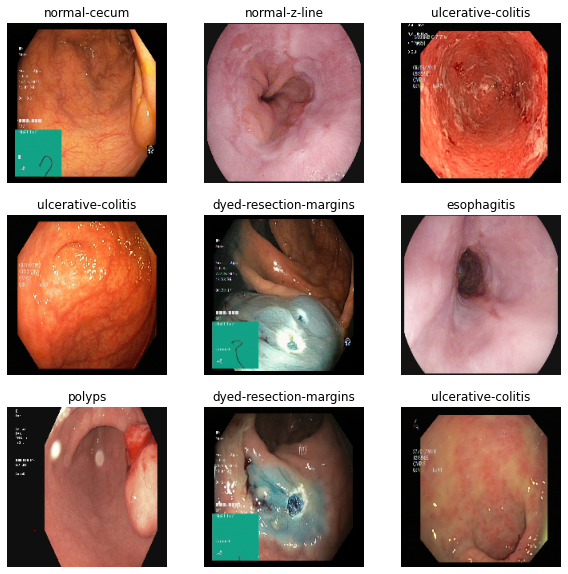

In [5]:
class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in test_data_generator:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break

### Baseline Model Implementation

In [57]:
### My base model ####
mybasemodel=Sequential()

mybasemodel.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(200,200,3)))
mybasemodel.add(BatchNormalization())
mybasemodel.add(MaxPooling2D(pool_size=(2,2))) 

mybasemodel.add(Conv2D(64,(3,3),padding='same',activation='relu'))
mybasemodel.add(BatchNormalization())
mybasemodel.add(MaxPooling2D(pool_size=(2,2)))

mybasemodel.add(Conv2D(64,(3,3),padding='same',activation='relu'))
mybasemodel.add(BatchNormalization())
mybasemodel.add(MaxPooling2D(pool_size=(2,2)))

mybasemodel.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
mybasemodel.add(BatchNormalization())
mybasemodel.add(MaxPooling2D(pool_size=(2,2)))
 

mybasemodel.add(Flatten())
mybasemodel.add(Dropout(0.2))
mybasemodel.add(Dense(512,activation='relu')) 
mybasemodel.add(Dropout(0.2))
mybasemodel.add(Dense(8,activation='softmax'))

mybasemodel.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

mybasemodel.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_118 (Conv2D)         (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_115 (Ba  (None, 200, 200, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 100, 100, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_119 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_116 (Ba  (None, 100, 100, 64)     256       
 tchNormalization)                                               
                                                     

In [58]:
random.seed(224)
print(datetime.now())
mybase_history = mybasemodel.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
                               generator=train_data_generator,
                               validation_data=validation_data_generator,
                               validation_steps=validation_data_generator.n//test_data_generator.batch_size,
                               epochs=50,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='best_mymodel.h5', monitor='val_loss', save_best_only=True)]
)
print(datetime.now())

2023-05-06 11:15:11.733848


C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\166784069.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mybase_history = mybasemodel.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),


Epoch 1/50
175/175 [==============================] - 508s 3s/step - loss: 1.8609 - accuracy: 0.5086 - val_loss: 7.1643 - val_accuracy: 0.1267
Epoch 2/50
175/175 [==============================] - 488s 3s/step - loss: 0.9483 - accuracy: 0.5775 - val_loss: 3.8265 - val_accuracy: 0.2433
Epoch 3/50
175/175 [==============================] - 487s 3s/step - loss: 0.8583 - accuracy: 0.6137 - val_loss: 3.0143 - val_accuracy: 0.4383
Epoch 4/50
175/175 [==============================] - 485s 3s/step - loss: 0.8230 - accuracy: 0.6229 - val_loss: 0.8763 - val_accuracy: 0.5817
Epoch 5/50
175/175 [==============================] - 469s 3s/step - loss: 0.7794 - accuracy: 0.6448 - val_loss: 1.3202 - val_accuracy: 0.5792
Epoch 6/50
175/175 [==============================] - 465s 3s/step - loss: 0.7702 - accuracy: 0.6509 - val_loss: 0.7918 - val_accuracy: 0.6117
Epoch 7/50
175/175 [==============================] - 490s 3s/step - loss: 0.7760 - accuracy: 0.6514 - val_loss: 0.8141 - val_accuracy: 0.6325

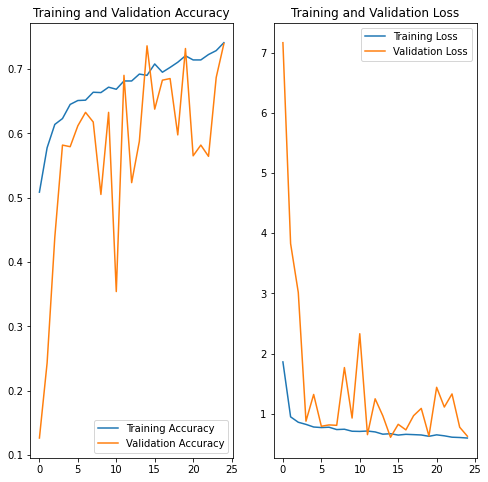

In [59]:
acc = mybase_history.history['accuracy']
val_acc = mybase_history.history['val_accuracy']

loss = mybase_history.history['loss']
val_loss = mybase_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [76]:
#### tuning model on the test dataset ###
baseline_model = load_model(filepath='best_mymodel.h5')
baseline_loss,baseline_acc=baseline_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\1336763969.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  baseline_loss,baseline_acc=baseline_model.evaluate_generator(generator=test_data_generator,


In [83]:
print ('The Baseline model Loss : ',baseline_loss)
print ('The Baseline model Accuracy : ',baseline_acc)

The Baseline model Loss :  0.5949649810791016
The Baseline model Accuracy :  0.7191666960716248


### Improved Implementation on the Baseline Model

In [65]:
### New model after adding additional layers

## changed filter to 4 * 4 for 3rd convolutional layer
## added another convolutional layer with 256 filters 
## Leaky Relu instead of Relu
## Additional dense layer with 512 nodes
### My base model ####
improvedmodel=Sequential()

improvedmodel.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(200,200,3)))
improvedmodel.add(BatchNormalization())
improvedmodel.add(MaxPooling2D(pool_size=(2,2))) 

improvedmodel.add(Conv2D(64,(3,3),padding='same',activation='relu'))
improvedmodel.add(BatchNormalization())
improvedmodel.add(MaxPooling2D(pool_size=(2,2)))

improvedmodel.add(Conv2D(64,(3,3),padding='same',activation='relu'))
improvedmodel.add(BatchNormalization())
improvedmodel.add(MaxPooling2D(pool_size=(2,2)))

improvedmodel.add(Conv2D(128,(4,4),padding='valid',activation=LeakyReLU(alpha=0.1)))
improvedmodel.add(BatchNormalization())
improvedmodel.add(MaxPooling2D(pool_size=(2,2)))

improvedmodel.add(Conv2D(256,(4,4),padding='valid',strides=(2, 2),activation=LeakyReLU(alpha=0.1)))
improvedmodel.add(BatchNormalization())
improvedmodel.add(MaxPooling2D(pool_size=(2,2)))
 
improvedmodel.add(Flatten())
improvedmodel.add(Dropout(0.2))
improvedmodel.add(Dense(512,activation='relu')) 
improvedmodel.add(Dropout(0.2))
improvedmodel.add(Dense(512,activation='relu')) 
improvedmodel.add(Dense(8,activation='softmax'))

improvedmodel.compile(loss='categorical_crossentropy',
  optimizer='adam',metrics=['accuracy'])

improvedmodel.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_142 (Conv2D)         (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_139 (Ba  (None, 200, 200, 32)     128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 100, 100, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 batch_normalization_140 (Ba  (None, 100, 100, 64)     256       
 tchNormalization)                                               
                                                     

In [66]:
#### revised model run ####
random.seed(224)
print(datetime.now())
improvedmodel_history = improvedmodel.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),
                               generator=train_data_generator,
                               validation_data=validation_data_generator,
                               validation_steps=validation_data_generator.n//test_data_generator.batch_size,
                               epochs=30,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='best_improvedmodel.h5', monitor='val_loss', save_best_only=True)]
)
print(datetime.now())

2023-05-06 15:13:38.604834


C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\3541835424.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  improvedmodel_history = improvedmodel.fit_generator (steps_per_epoch=(train_data_generator.n//train_data_generator.batch_size),


Epoch 1/30
175/175 [==============================] - 522s 3s/step - loss: 1.1040 - accuracy: 0.5571 - val_loss: 4.4680 - val_accuracy: 0.1467
Epoch 2/30
175/175 [==============================] - 478s 3s/step - loss: 0.8779 - accuracy: 0.6071 - val_loss: 2.0608 - val_accuracy: 0.3333
Epoch 3/30
175/175 [==============================] - 493s 3s/step - loss: 0.7709 - accuracy: 0.6463 - val_loss: 0.7425 - val_accuracy: 0.6633
Epoch 4/30
175/175 [==============================] - 490s 3s/step - loss: 0.7322 - accuracy: 0.6570 - val_loss: 0.6758 - val_accuracy: 0.6817
Epoch 5/30
175/175 [==============================] - 485s 3s/step - loss: 0.7397 - accuracy: 0.6600 - val_loss: 0.9650 - val_accuracy: 0.5367
Epoch 6/30
175/175 [==============================] - 475s 3s/step - loss: 0.6947 - accuracy: 0.6841 - val_loss: 0.9190 - val_accuracy: 0.6192
Epoch 7/30
175/175 [==============================] - 475s 3s/step - loss: 0.6988 - accuracy: 0.6782 - val_loss: 0.7579 - val_accuracy: 0.6658

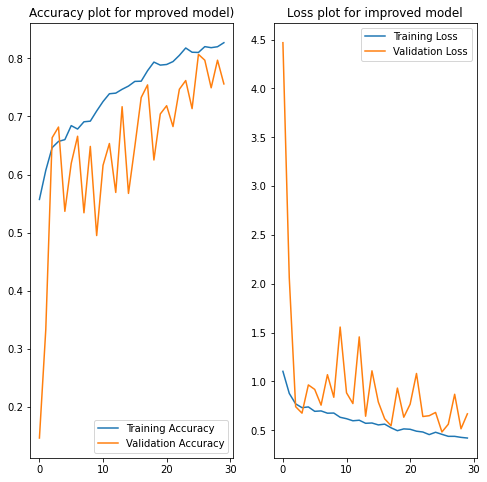

In [72]:
acc = improvedmodel_history.history['accuracy']
val_acc = improvedmodel_history.history['val_accuracy']

loss = improvedmodel_history.history['loss']
val_loss = improvedmodel_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy plot for mproved model)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss plot for improved model' )
plt.show()

In [80]:
#### tuning model on the test dataset ###
improved_model = load_model(filepath='best_improvedmodel.h5')
improved_model_loss,improved_model_acc=best_model.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\2415581896.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  improved_model_loss,improved_model_acc=best_model.evaluate_generator(generator=test_data_generator,


In [82]:
print ('The improved model Loss : ',improved_model_loss)
print ('The improved model Accuracy : ',improved_model_acc)

The improved model Loss :  0.486258864402771
The improved model Accuracy :  0.8058333396911621


### Transfer Learning Implementation using Resnet without retraining the Resnet50 layers

In [177]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(200,200,3),
                   pooling='max',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512,activation='relu')) 
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(512,activation='relu')) 
resnet_model.add(Dense(8,activation='softmax'))

In [178]:
resnet_model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_55 (Flatten)        (None, 2048)              0         
                                                                 
 dropout_94 (Dropout)        (None, 2048)              0         
                                                                 
 dense_151 (Dense)           (None, 512)               1049088   
                                                                 
 dropout_95 (Dropout)        (None, 512)               0         
                                                                 
 dense_152 (Dense)           (None, 512)               262656    
                                                                 
 dense_153 (Dense)           (None, 8)               

In [99]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
epochs=30
history = resnet_model.fit(
  train_data_generator,
  validation_data=validation_data_generator,
  epochs=epochs
)

Epoch 1/30
175/175 [==============================] - 536s 3s/step - loss: 2.0667 - accuracy: 0.1845 - val_loss: 1.7811 - val_accuracy: 0.2783
Epoch 2/30
175/175 [==============================] - 541s 3s/step - loss: 1.9577 - accuracy: 0.2132 - val_loss: 1.7144 - val_accuracy: 0.2892
Epoch 3/30
175/175 [==============================] - 535s 3s/step - loss: 1.8807 - accuracy: 0.2346 - val_loss: 1.8234 - val_accuracy: 0.2242
Epoch 4/30
175/175 [==============================] - 570s 3s/step - loss: 1.8530 - accuracy: 0.2370 - val_loss: 1.7266 - val_accuracy: 0.2467
Epoch 5/30
175/175 [==============================] - 553s 3s/step - loss: 1.7735 - accuracy: 0.2596 - val_loss: 1.6277 - val_accuracy: 0.2700
Epoch 6/30
175/175 [==============================] - 565s 3s/step - loss: 1.7564 - accuracy: 0.2680 - val_loss: 1.6273 - val_accuracy: 0.2642
Epoch 7/30
175/175 [==============================] - 539s 3s/step - loss: 1.7562 - accuracy: 0.2577 - val_loss: 1.5619 - val_accuracy: 0.2900

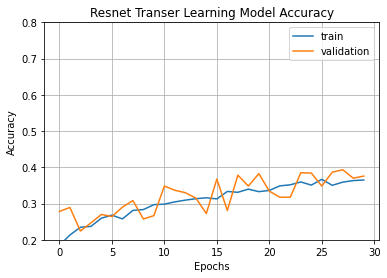

In [110]:
##### evaluation the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.2,ymax=0.8)
plt.grid()
plt.title('Resnet Transer Learning Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
     

## Resize Images to 170*170

In [131]:
### Resize the image to 170*170

#from tensorflow.keras.preprocessing.image import ImageDataGenerator, mixup_generator


train_dataAugmentation_resize = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5,0.9),
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    fill_mode='nearest',
    )

test_dataAugmentation_resize = ImageDataGenerator(rescale=1./255)

trainpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\train"
validationpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\validation"
testpath="D:\\STUDY MATERIAL\\Masters DS & Analytics\\Semester 2\\Data Visualization\\Assignment2\\kvasir-dataset-v2\\test"


train_data_generator_resize=train_dataAugmentation.flow_from_directory(trainpath,
                                                 target_size=(170,170),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

#train_data_generator_mixup = mixup_generator(train_data_generator_resize)

validation_data_generator_resize =test_dataAugmentation.flow_from_directory(validationpath,
                                        target_size=(170,170),
                                       batch_size=50,
                                       class_mode='categorical')

test_data_generator_resize =test_dataAugmentation.flow_from_directory(testpath,
                                        target_size=(170,170),
                                       batch_size=50,
                                       class_mode='categorical')


Found 5600 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


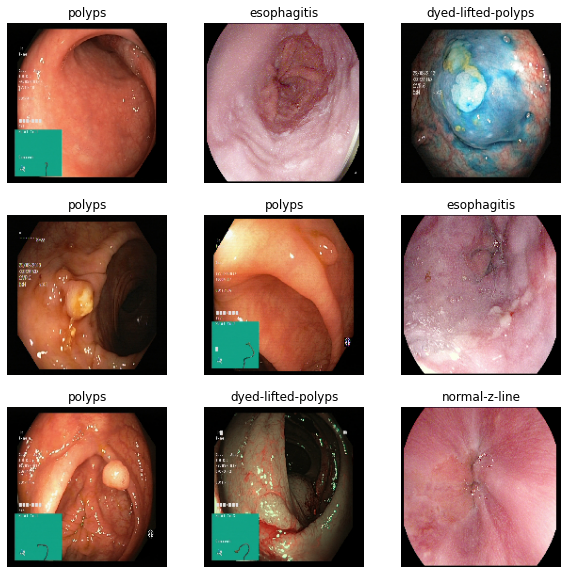

In [132]:
### To check Actual image view
random.seed(224)
class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in test_data_generator_resize:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break

### Resize images to 170*170 

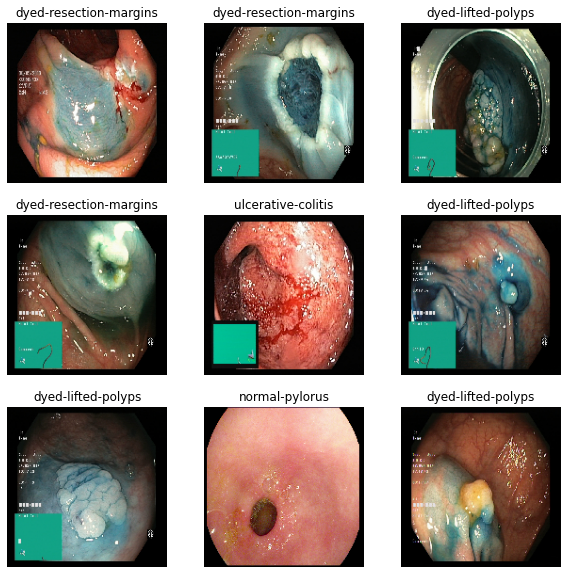

In [133]:
### To check resized image view
random.seed(224)
class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in test_data_generator_resize:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break

### Transfer Learning using ResNet50 implementation with retraining the pretrained layers of ResNet

In [173]:
### resize with image and impot the resent50 framework from Keras libary and relaxing the pretrained layers
resnet_model_resize = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(170,170,3),
                   pooling='max',classes=8,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model_resize.add(pretrained_model)
#resnet_model_resize.add(Dropout(0.2))
resnet_model_resize.add(Flatten())
resnet_model_resize.add(Dropout(0.2))
resnet_model_resize.add(Dense(512,activation='relu')) 
resnet_model_resize.add(Dropout(0.2))
resnet_model_resize.add(Dense(512,activation='relu')) 
resnet_model_resize.add(Dense(8,activation='softmax'))

### compile with learning rate as 0.001
resnet_model_resize.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [174]:
for i, layer in enumerate(pretrained_model.layers):
    print(i, layer.name,"-",layer.trainable)

0 input_19 - True
1 conv1_pad - True
2 conv1_conv - True
3 conv1_bn - True
4 conv1_relu - True
5 pool1_pad - True
6 pool1_pool - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_conv - True
11 conv2_block1_2_bn - True
12 conv2_block1_2_relu - True
13 conv2_block1_0_conv - True
14 conv2_block1_3_conv - True
15 conv2_block1_0_bn - True
16 conv2_block1_3_bn - True
17 conv2_block1_add - True
18 conv2_block1_out - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_conv - True
23 conv2_block2_2_bn - True
24 conv2_block2_2_relu - True
25 conv2_block2_3_conv - True
26 conv2_block2_3_bn - True
27 conv2_block2_add - True
28 conv2_block2_out - True
29 conv2_block3_1_conv - True
30 conv2_block3_1_bn - True
31 conv2_block3_1_relu - True
32 conv2_block3_2_conv - True
33 conv2_block3_2_bn - True
34 conv2_block3_2_relu - True
35 conv2_block3_3_conv - True
36 conv2_block3_3_bn - True
3

In [179]:
random.seed(224)
print(datetime.now())
transfer_history = resnet_model_resize.fit_generator (steps_per_epoch=(train_data_generator_resize.n//train_data_generator_resize.batch_size),
                               generator=train_data_generator_resize,
                               validation_data=train_data_generator_resize,
                               validation_steps=train_data_generator_resize.n//test_data_generator_resize.batch_size,
                               epochs=2,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='transfer.h5', monitor='val_loss', save_best_only=True)]
)
print(datetime.now())

2023-05-07 10:23:12.942472


C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\499018594.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transfer_history = resnet_model_resize.fit_generator (steps_per_epoch=(train_data_generator_resize.n//train_data_generator_resize.batch_size),


Epoch 1/2
175/175 [==============================] - 1648s 9s/step - loss: 1.1966 - accuracy: 0.6137 - val_loss: 2.9084 - val_accuracy: 0.1264
Epoch 2/2
175/175 [==============================] - 3684s 21s/step - loss: 0.6731 - accuracy: 0.7379 - val_loss: 4.4667 - val_accuracy: 0.1270
2023-05-07 11:52:06.135799


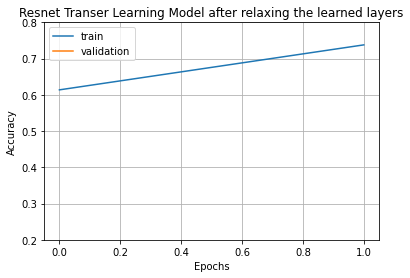

In [180]:
##### evaluation the model
fig1 = plt.gcf()
plt.plot(transfer_history.history['accuracy'])
plt.plot(transfer_history.history['val_accuracy'])
plt.axis(ymin=0.2,ymax=0.8)
plt.grid()
plt.title('Resnet Transer Learning Model after relaxing the learned layers')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

### Transfer Learning using MobileNet implementation

In [185]:
# Try to train using Mobilenet

from keras.applications import MobileNet

mobilenet_model = Sequential()

pretrained_model_mobilenet=  tf.keras.applications.MobileNetV2(
                    input_shape=(170,170,3),
                    alpha=1.0,
                    include_top=False,
                    weights="imagenet",
                    pooling=max,
                    classes=8)

for layer in pretrained_model_mobilenet.layers:
        layer.trainable=False

mobilenet_model.add(pretrained_model_mobilenet)
mobilenet_model.add(Flatten())
mobilenet_model.add(Dropout(0.2))
mobilenet_model.add(Dense(512,activation='relu')) 
mobilenet_model.add(Dropout(0.2))
mobilenet_model.add(Dense(512,activation='relu')) 
mobilenet_model.add(Dense(8,activation='softmax'))

### compile with learning rate as 0.001
mobilenet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [187]:
random.seed(224)
print(datetime.now())
mobilenet_history = mobilenet_model.fit_generator (steps_per_epoch=(train_data_generator_resize.n//train_data_generator_resize.batch_size),
                               generator=train_data_generator_resize,
                               validation_data=train_data_generator_resize,
                               validation_steps=train_data_generator_resize.n//test_data_generator_resize.batch_size,
                               epochs=30,
                               callbacks = [EarlyStopping(monitor='val_loss', patience=10),
                               ModelCheckpoint(filepath='transfer.h5', monitor='val_loss', save_best_only=True)]
)
print(datetime.now())

2023-05-07 15:33:07.230745


C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\207445051.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mobilenet_history = mobilenet_model.fit_generator (steps_per_epoch=(train_data_generator_resize.n//train_data_generator_resize.batch_size),


Epoch 1/30
175/175 [==============================] - 554s 3s/step - loss: 0.7696 - accuracy: 0.7011 - val_loss: 0.5939 - val_accuracy: 0.7653
Epoch 2/30
175/175 [==============================] - 563s 3s/step - loss: 0.7470 - accuracy: 0.7134 - val_loss: 0.5084 - val_accuracy: 0.7916
Epoch 3/30
175/175 [==============================] - 545s 3s/step - loss: 0.7119 - accuracy: 0.7316 - val_loss: 0.6225 - val_accuracy: 0.7249
Epoch 4/30
175/175 [==============================] - 573s 3s/step - loss: 0.6830 - accuracy: 0.7420 - val_loss: 0.4975 - val_accuracy: 0.8008
Epoch 5/30
175/175 [==============================] - 635s 4s/step - loss: 0.6449 - accuracy: 0.7513 - val_loss: 0.5365 - val_accuracy: 0.7640
Epoch 6/30
175/175 [==============================] - 607s 3s/step - loss: 0.6090 - accuracy: 0.7616 - val_loss: 0.4561 - val_accuracy: 0.8192
Epoch 7/30
175/175 [==============================] - 560s 3s/step - loss: 0.6056 - accuracy: 0.7709 - val_loss: 0.5352 - val_accuracy: 0.7801

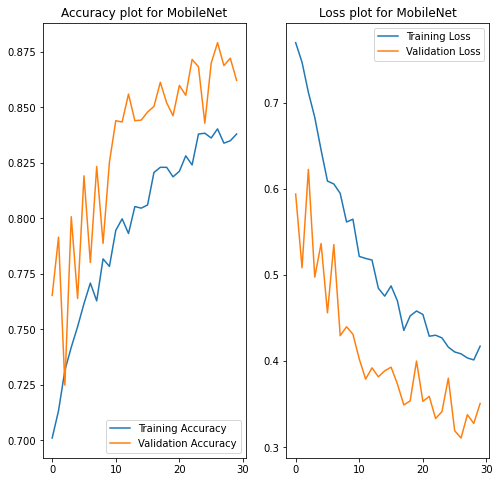

In [189]:
######### plot the MobileNet model
acc = mobilenet_history.history['accuracy']
val_acc = mobilenet_history.history['val_accuracy']

loss = mobilenet_history.history['loss']
val_loss = mobilenet_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy plot for MobileNet')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss plot for MobileNet' )
plt.show()

In [190]:
#### tuning model on the test dataset ###
mobilenetmodel = load_model(filepath='transfer.h5')
mobile_model_loss,mobile_model_acc=mobilenetmodel.evaluate_generator(generator=test_data_generator,
steps=test_data_generator.n//test_data_generator.batch_size)

C:\Users\anoop\AppData\Local\Temp\ipykernel_9300\3263728734.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  mobile_model_loss,mobile_model_acc=mobilenetmodel.evaluate_generator(generator=test_data_generator,


In [191]:
print ('The improved model Loss : ',mobile_model_loss)
print ('The improved model Accuracy : ',mobile_model_acc)

The improved model Loss :  0.456878662109375
The improved model Accuracy :  0.8116666674613953
